# Q.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("diabetes.csv")

In [2]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
features_list=list(df.columns)

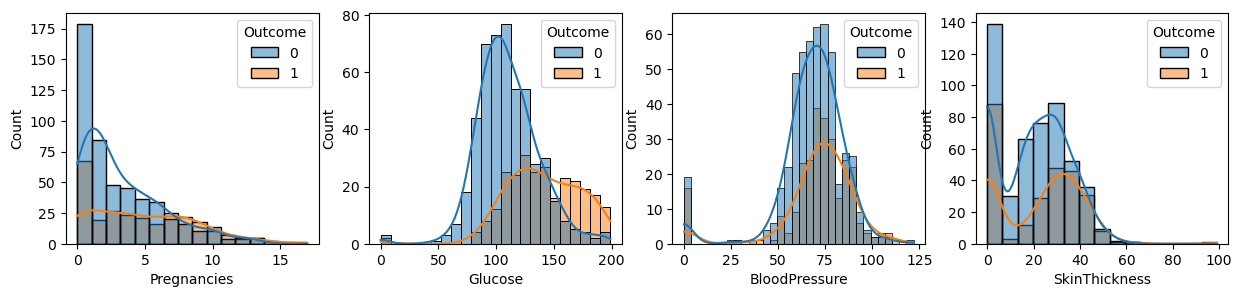

In [5]:
plt.figure(figsize=(15,3))
for i in range(4):
    plt.subplot(1,4,i+1)
    sns.histplot(x=features_list[i],data=df,hue='Outcome',kde=True)

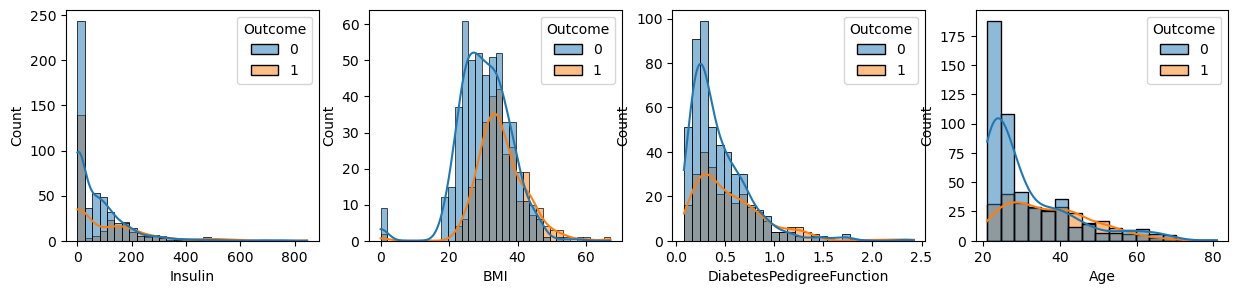

In [6]:
plt.figure(figsize=(15,3))
for i in range(4,8):
    plt.subplot(1,4,i-3)
    sns.histplot(x=features_list[i],data=df,hue='Outcome',kde=True)

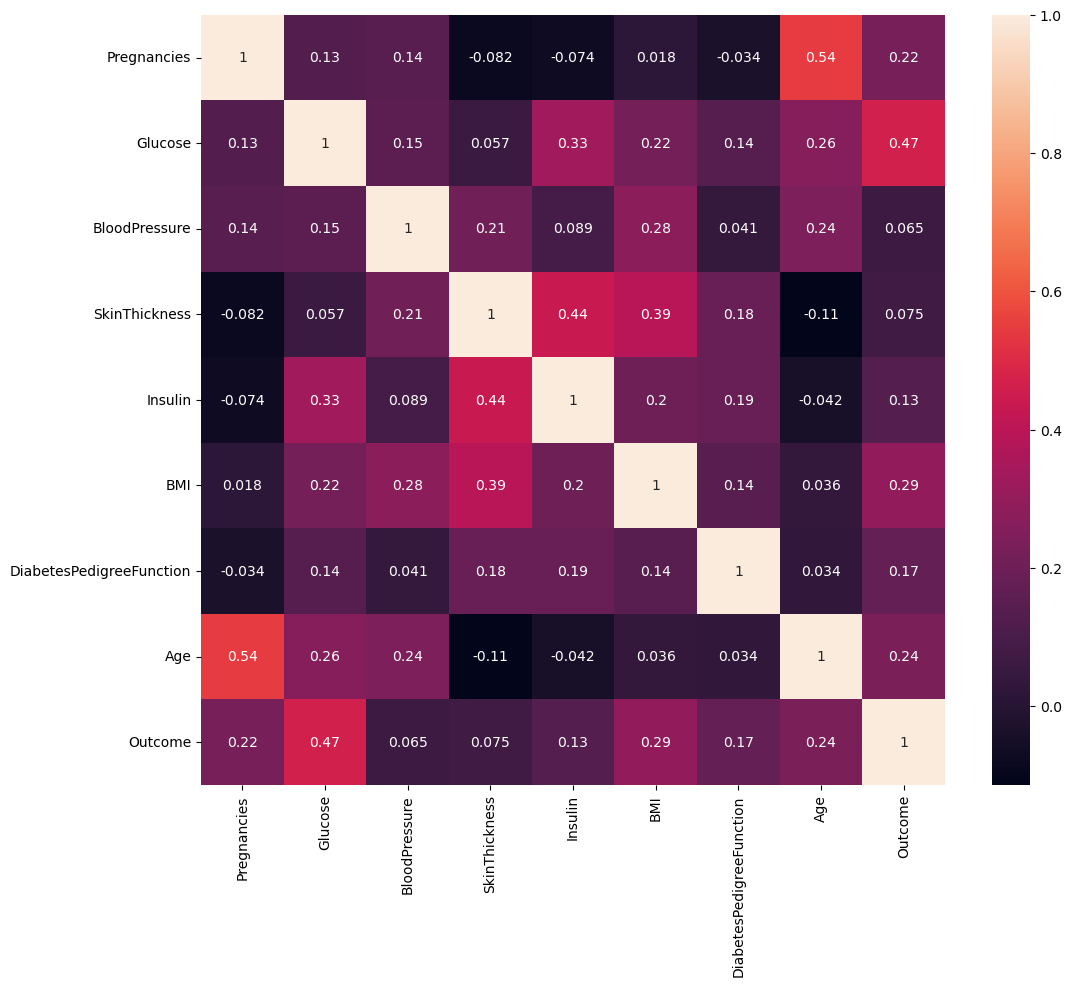

In [7]:
# check for multicollinearity
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [8]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

correlation(df,0.8)
#There is no correlated features

set()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-p

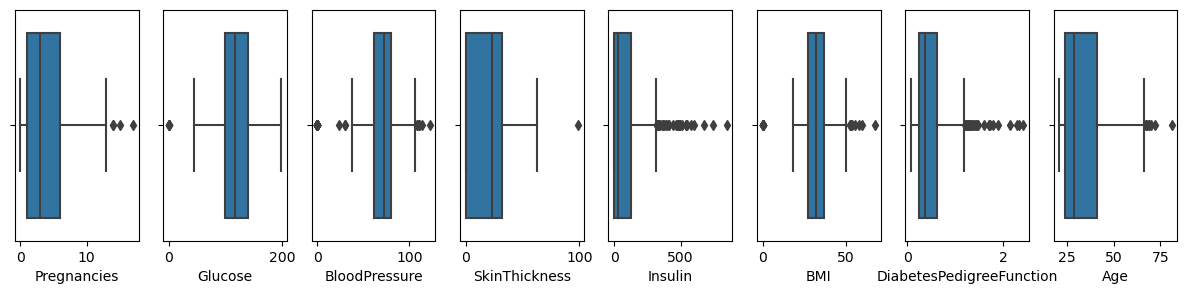

In [9]:
plt.figure(figsize=(15,3))
for i in range(8):
    plt.subplot(1,8,i+1)
    sns.boxplot(df[features_list[i]])
plt.show()

# Q.2

In [21]:
data = pd.read_csv("diabetes.csv")
data["Outcome"] = data["Outcome"].apply(lambda x: 1 if x == 1 else 0)

In [22]:
df.isnull().sum()
#No missing values found 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
#Handling Outliers
def remove_outliers(data,col):
    Q1=np.percentile(data[col],25)
    Q3=np.percentile(data[col],75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return data[(data[col]>=lower_bound)& (data[col]<=upper_bound)]
for col in data.columns[:-1]:
    data = remove_outliers(data, col)

In [20]:
data = pd.get_dummies(data)

# Q.3

In [25]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

# Q.4

In [30]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

parameter = {
    'criterion' : ['gini','entropy','log_loss'],
    'splitter' : ['best','random'],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14],
    'max_features' : ['auto','sqrt','log2']
}

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(DecisionTreeClassifier(), param_grid=parameter, cv=5, scoring='accuracy')

# Train the data
clf.fit(X_train,y_train)

print(clf.best_params_)
y_pred = clf.predict(X_test)

{'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'splitter': 'best'}


In [31]:
c = DecisionTreeClassifier(criterion='gini',max_depth=3,max_features='log2',splitter='best')
c.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features='log2')

# Q.5

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[120  56]
 [ 28  27]]
0.6363636363636364
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       176
           1       0.33      0.49      0.39        55

    accuracy                           0.64       231
   macro avg       0.57      0.59      0.57       231
weighted avg       0.70      0.64      0.66       231



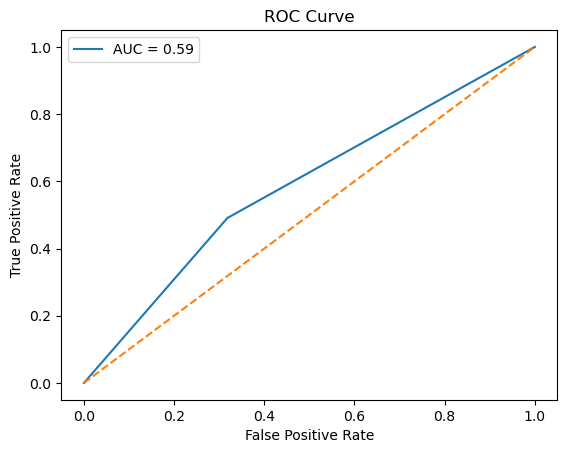

In [42]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_pred, y_test)

# Calculate the AUC (area under the curve) of the ROC curve
auc = metrics.roc_auc_score(y_pred, y_test)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Q.6

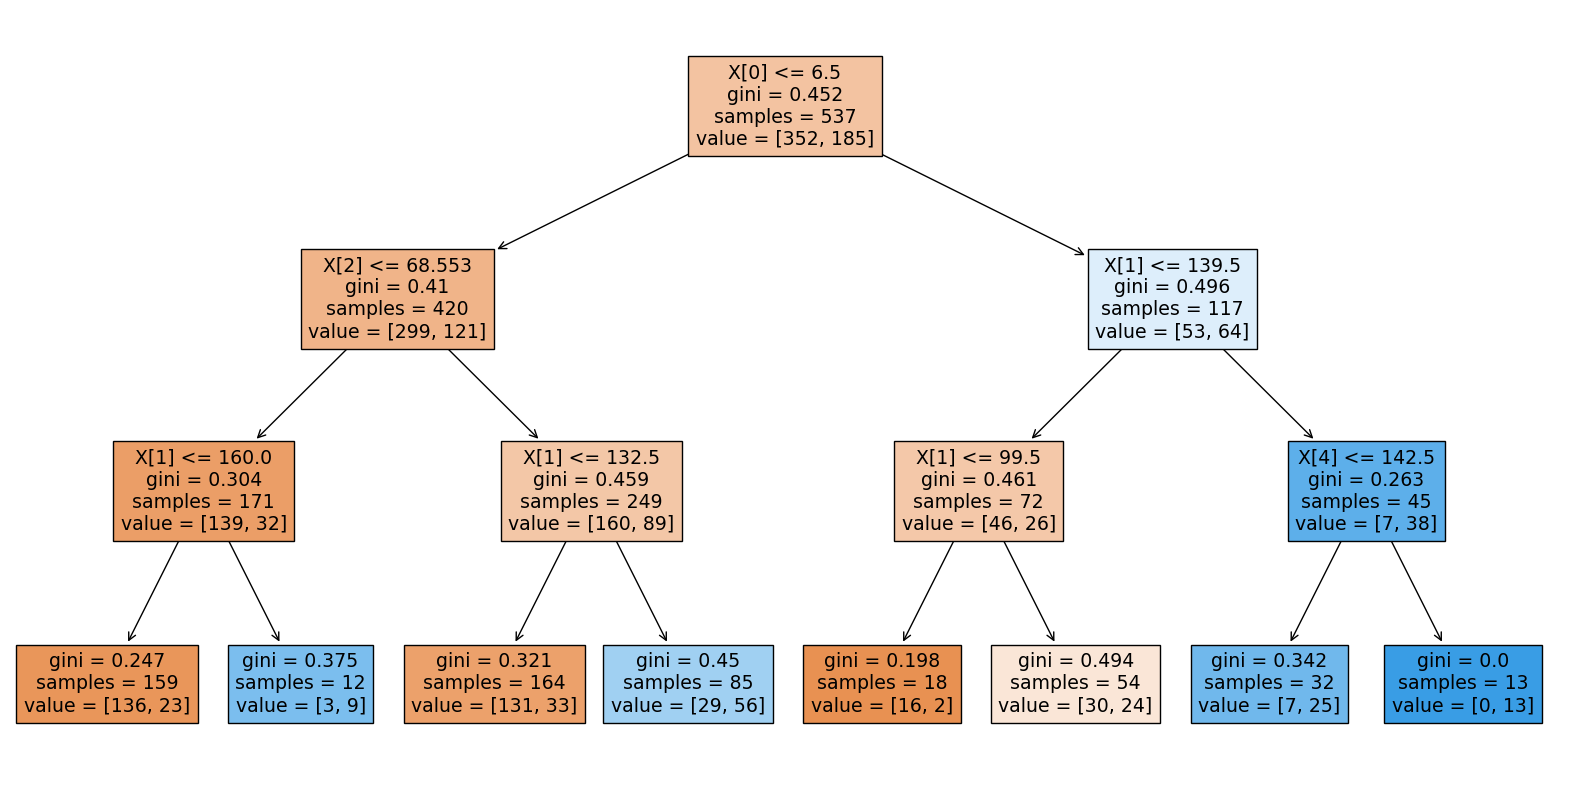

In [43]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(c, filled=True)
plt.show()

# Q.7

One way to validate the decision tree model is to apply it to new data that was not used in training or testing. This can help determine if the model can generalize to unseen data and perform well in real-world scenarios. Another way to test the robustness of the model is to perform sensitivity analysis and scenario testing. To validate the decision tree model, we can apply it to new data that was not used for training or testing. This can help us assess the generalizability of the model and its ability to perform well on unseen data. Also, we can simulate different scenarios to test its robustness and generalizability.

One way to do this is to use a hold-out dataset, which is a set of data that was not used for training or tuning the model. We can apply the trained decision tree model to this hold-out dataset and evaluate its performance using the same metrics as before, such as accuracy, precision, recall, and F1 score. If the performance of the model on the hold-out dataset is similar to the performance on the test set, it suggests that the model is able to generalize well to new data.

Sensitivity analysis involves varying the input variables and observing the effect on the output. For example, we can test how sensitive the model is to changes in the threshold values used for splitting the nodes. We can also test how sensitive the model is to changes in the relative importance of the input variables.

Scenario testing involves simulating different scenarios and testing the model's performance under different conditions. For example, we can test how the model performs when the prevalence of diabetes in the population changes, or when the distribution of the input variables changes due to changes in the environment or population demographics.

Robustness testing involves testing the model's performance under different environmental conditions, such as changes in the data collection process or changes in the population being studied. This can help us determine if the model is still accurate and reliable in different contexts.

Overall, validation is an important step in the model development process to ensure that the model is robust, accurate, and reliable in different scenarios and contexts. Validating a decision tree model involves assessing its performance on new data and testing its robustness and generalizability under different scenarios and conditions. This can help us gain confidence in the model's ability to make accurate predictions and support decision-making in real-world applications.

There are several ways to validate a decision tree model and test its robustness. Here are a few techniques:

1. Cross-validation: Cross-validation is a technique that involves dividing the dataset into several subsets and using each subset as a test set while using the remaining subsets as the training set. This technique can help evaluate the model's performance on different subsets of the data and avoid overfitting.
2. Holdout testing: Holdout testing involves splitting the dataset into two parts: a training set and a testing set. The model is trained on the training set and then tested on the testing set. This technique can help evaluate the model's performance on unseen data.
3. Sensitivity analysis: Sensitivity analysis involves varying the input variables and observing how the output changes. This technique can help assess how sensitive the model is to changes in the data and can identify which variables have the greatest impact on the output.
4. Scenario testing: Scenario testing involves testing the model's performance under different scenarios or assumptions. For example, one might test the model's performance if there is missing data, if there are errors in the input data, or if the distribution of the input data changes.